In [ ]:
# Se importa drive para acceder a los repositorios de datos en Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [47]:
# Se importan las distintas librerías que sse usarán

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [53]:
# Se crea el dataframe y se toman los datos desde un archivo de extensión csv que tengo en Drive

filename = '/content/drive/MyDrive/CargaData/CargaML/cars.csv'
dfAutos = pd.read_csv(filename)

In [ ]:
# Se agregaron los nombres de las columnas ya que que no venían
dfAutos.columns =['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'brand'] 
dfAutos.head()

In [79]:
# Vemos toda la información relacionada a la cantidad de filas y columnas, tipos de dato, nombres de columnas y si hay datos nulos 
dfAutos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           390 non-null    float64
 1   cylinders     390 non-null    int64  
 2   displacement  390 non-null    float64
 3   horsepower    390 non-null    int64  
 4   weight        390 non-null    int64  
 5   acceleration  390 non-null    float64
 6   model year    390 non-null    int64  
 7   origin        390 non-null    int64  
 8   brand         390 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.5+ KB


In [56]:
# Se revisaron los datos y se identificó que en la columna venía un caracter extraño. Era el caracter ?. Se hizo un replace por cero y después se convirtió el tipo de dato a int 64.
dfAutos['horsepower'] = dfAutos['horsepower'].replace('?', 0)
dfAutos['horsepower'] = dfAutos['horsepower'].astype('int64')

In [ ]:
# En este dataset los datos iguales a cero se interpretan como falta de información por la naturaleza de los datos y considerar ceros en los datos sería un error que entregaría resultados basados en premisas erróneas. 
# Ej. Un auto no puede tener 0 cilindro o una cilindrada de 0. Tampoco puede tener 0 caballos de fuerza ni tiempo de aceleración de 0 a 60 mph de 0 segundos. 
# Por lo anterior, se revisaron una a una las columnas en busca de datos en cero y los resultados fueron los siguientes:

datosCero = dfAutos[dfAutos['mpg'] == 0] # NO HAY
datosCero = dfAutos[dfAutos['cylinders'] == 0] # NO HAY
datosCero = dfAutos[dfAutos['displacement'] == 0] # NO HAY
datosCero = dfAutos[dfAutos['horsepower'] == 0] # 6
datosCero = dfAutos[dfAutos['weight'] == 0] # NO HAY
datosCero = dfAutos[dfAutos['acceleration'] == 0] # NO HAY
datosCero = dfAutos[dfAutos['model year'] == 0] # NO HAY
datosCero = dfAutos[dfAutos['origin'] == 0] # NO HAY

dfAutos = dfAutos[dfAutos['horsepower'] != 0]
dfAutos
# Solo en la columna horsepower habían ceros por el replace del caracter extraño hecho anteriormente. A continuación esos datos se eliminaron para no afectar el conjunto de datos.
# Se eliminó el 1,51% de los datos, quedando para análisis el 98,49% (391 filas)


In [ ]:
# Se detectó 1 fila repetida. El 91% de los datos son iguales, siendo la única diferencia el año. La fila se elimina.

dfAutos = dfAutos[~((dfAutos['mpg'] == 27) & (dfAutos['cylinders'] == 4) & (dfAutos['displacement'] == 97) & (dfAutos['horsepower'] == 88) & (dfAutos['weight'] == 2130) & (dfAutos['acceleration'] == 14.5) & (dfAutos['model year'] == 71))]
dfAutos.info()

Todas las columnas numéricas quedaron con tipo de dato numérico (int o float) y se eliminaron los datos cero, limpiando de esa manera los datos. Ahora, el dataframe está listo para continuar trabajando en él.  

In [80]:
# Se crean dos variables para separar los datos de la matriz y los datos de la columna Target u Objetivo 

X = dfAutos.drop(columns = ['mpg']) # MATRIZ
y = dfAutos['mpg'] # TARGET U OBJETIVO

# Se hace train test split en los datos. Se utiliza el número 42 por coherencia.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # LOS DATOS YA ESTÁN DIVIDIDOS EN TRAIN Y TEST PARA LA MATRIZ X Y PARA EL GRUPO TARGET Y

In [81]:
# Se crean selectores identificando las columnas de categorías y las numéricas
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

# LOS DATOS YA FUERON LIMPIADOS Y NO HAY DATOS EN BLANCO, FALTANTES O EN CERO, POR LO TANTO NO ES NECESARIO AGREGAR IMPUTERS 
# Imputers: Más frecuente y Media
# freq_imputer = SimpleImputer(strategy='most_frequent')
# mean_imputer = SimpleImputer(strategy='mean')

# Scaler
scaler = StandardScaler()

# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
# Pipelines Numéricos
numeric_pipe = make_pipeline(scaler)
numeric_pipe

In [ ]:
# Pipelines de Categorías
categorical_pipe = make_pipeline(ohe)
categorical_pipe

In [ ]:
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder = 'passthrough')
preprocessor

In [85]:
#Transformando datos
preprocessor.fit(X_train)

# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Comprobar que los datos se escalen y tengan una codificación one-hot

print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('Shape of data is', X_train_processed.shape, '\n')
print('DATOS TRAIN PROCESADOS', X_train_processed, '\n')
print('DATOS TEST PROCESADOS ', X_test_processed)

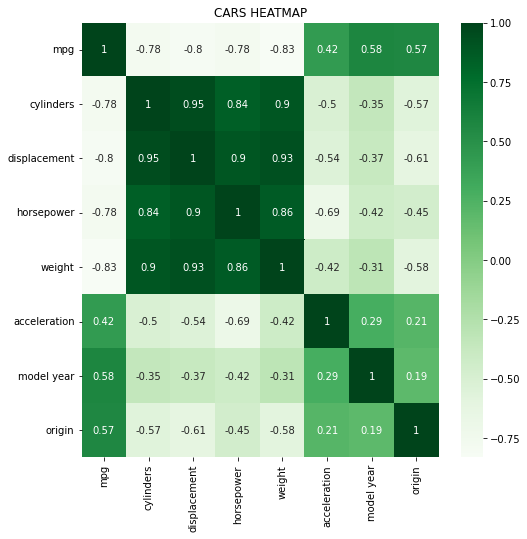

In [91]:
# Mapa de Calor

# Se calcula la correlación
corr = dfAutos.corr()

# Se crea el mapa de calor
plt.figure(figsize = (8,8))
plt.title('CARS HEATMAP')
sns.heatmap(corr, cmap = 'Greens', annot = True);

Se interpreta del mapa que mpg (nuestra columna target) tiene una relación bastante fuerte con el número de cilindros, cilindrada, caballos de fuerza y peso del auto, por lo que se entiende que dichas columnas inciden directamente en las predicciones que se harán más adelante.

En cambio, el año y la procedencia del auto tienen una relación bastante moderada, más cercanas a la columna aceleración que es la con menos incidencia. Esta última columna mencionada muestra una relativamente baja relación con la columna target.

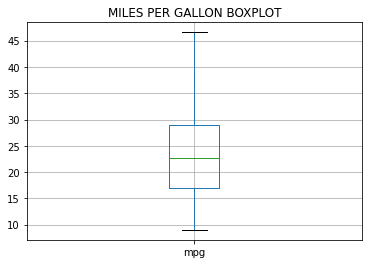

In [92]:
# Revisión de datos atípicos

plt.title('MILES PER GALLON BOXPLOT')
dfAutos.boxplot(column = 'mpg');

media = dfAutos['mpg'].mean() # 23.45076923076923
mediana = dfAutos['mpg'].median() # 22.75
#print('La media es ', media)
#print('La mediana es ', mediana)

El boxplot muestra que es una distribución simétrica, dado que la mediana está dentro de la caja, dividiéndola en 2. En este caso, la media (23.45) es levemente mayor que la mediana (22.75) pero esa pequeña diferencia y la ubicación en la que se corta la caja indica que la distribución es prácticamente simétrica. 

Los bigotes de la caja indican los valores menor y mayor encontrados en la columna mpg. Como se aprecia, no se ven valores atípicos o fuera de rango.

FUENTE: https://www.pgconocimiento.com/diagrama-boxplot/#:~:text=El%20Diagrama%20de%20Caja%20y,valores%20at%C3%ADpicos%20y%20comparar%20distribuciones